In [10]:
import pandas as pd

In [9]:
import numpy as np

In [6]:
df = pd.read_csv('../dyck1_test1', header=None, index_col=None)

serieslen = [len(i[i.find('s')+1: i.find('e')]) for i in df[0]]

df[2] = serieslen

dfg = df.groupby(2).groups



In [7]:
dfg.keys()

dict_keys([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [11]:
chunk = 20000 // 15 + 1

l = list()
for k in dfg.keys():
    klen = len(dfg[k])
    if klen < chunk:
        candidate = list(dfg[k]) * (chunk // klen + 1)
        candidate = candidate[:chunk]
        for i in candidate:
            l.append(tuple(df.iloc[i, [0,1]].values.tolist()))
    else:
        candidate = np.random.permutation(range(klen))[:chunk]
        for i in candidate:
            l.append(tuple(df.iloc[dfg[k][i], [0,1]].values.tolist()))
        

traindf = pd.DataFrame(l).sample(20000)

In [12]:
traindf.to_csv('dyck1_train', header=None, index=None)


both = df[[0, 1]].values.tolist()

both = [(a, b) for a, b in both]

count = 0
testl = list()
for i in both:
    if i not in l:
        testl.append(i)
    count += 1


testdf = pd.DataFrame(testl).sample(1000)
testdf.to_csv('dyck1_test1', header=None, index=None)

In [7]:
for i in range(2, 6):
    df = pd.read_csv('./dyck1_test'+str(i), header=None, index_col=None)

    df = df.reindex(np.random.permutation(df.index))
    df = df[:1000]
    df.to_csv('dyck1_test'+str(i), header=None, index=None)


<BarContainer object of 15 artists>

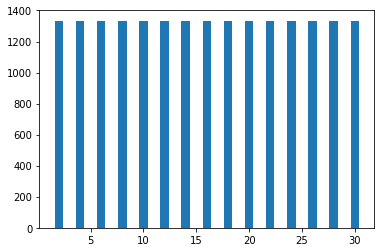

In [13]:
import pandas as pd

import matplotlib.pyplot as plt

# check length

dyck1 = pd.read_csv('dyck1_train', header=None, index_col=None)

dyck1l = dyck1.values.tolist()

dyck1ll = list(map(lambda x: len(x[0][x[0].find('s')+1: x[0].find('e')]), dyck1l))

from collections import defaultdict
dyck1d = defaultdict(lambda: 0)
for i in dyck1ll:
    dyck1d[i] += 1

plt.bar(dyck1d.keys(), dyck1d.values())

In [2]:
len(dyck1)

20000